In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -uq 'drive/My Drive/brain tumor/archive1.zip'

In [3]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import glob
import warnings
from keras.layers import Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D
from keras.models import Sequential

from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [4]:
import skimage
from skimage.transform import resize
def read_images(path,name):
      images=[]
      labels=[]
      for img in glob.glob(path+"/"+name+"/*.jpg") :
           image=cv2.imread(img)
           img = skimage.transform.resize(image, (48, 48, 3))
           images.append(img)
           labels.append(name)
      return images,labels


In [5]:
import numpy as np
images_tumor,labels=read_images('Brain Tumor Data Set/Brain Tumor Data Set','Brain Tumor')
np.array(images_tumor).shape



(2358, 48, 48, 3)

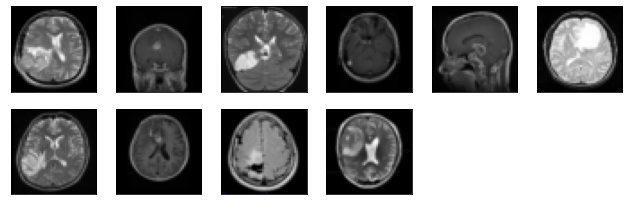

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,11))
for i in range(10):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(images_tumor[i])

In [20]:
all_images=[]
all_labels=[]
labels=['Brain Tumor','Healthy']
for label in labels:
  images,labels=read_images('Brain Tumor Data Set/Brain Tumor Data Set',label)
  all_images+=images
  all_labels+=labels
  

In [21]:

np.array(all_images).shape

(4432, 48, 48, 3)

In [22]:
X_full=np.array(all_images)

In [24]:
y=np.array(all_labels)

In [12]:
dict={0:'brain tumor',1:'healthy'}

In [25]:

for i, element in enumerate(y):
  if element == 'Brain Tumor':
    y[i]=0
  else:
     y[i]=1

In [26]:
y=tf.keras.utils.to_categorical(y,2)

In [15]:

X_full.shape[0]

4432

In [16]:
y.shape

(2074, 2)

In [33]:
from tensorflow import keras 
from tensorflow.keras import layers 
from keras.layers import Conv2D,Flatten,Dense,Dropout,Activation,MaxPooling2D
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.regularizers import l2
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(1024,activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Dropout(rate=0.4))
model.add(Dense(2,activation='sigmoid'))

In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(X_full,y,validation_split=0.1,batch_size=20,epochs=10)

Epoch 1/10
200/200 [==============================] - 211s 1s/step - loss: 0.7325 - accuracy: 0.6698 - val_loss: 1.0924 - val_accuracy: 0.2523
Epoch 2/10
200/200 [==============================] - 205s 1s/step - loss: 0.5284 - accuracy: 0.8027 - val_loss: 0.3384 - val_accuracy: 0.9054
Epoch 3/10
200/200 [==============================] - 206s 1s/step - loss: 0.4128 - accuracy: 0.8548 - val_loss: 0.3753 - val_accuracy: 0.8739
Epoch 4/10
200/200 [==============================] - 206s 1s/step - loss: 0.3474 - accuracy: 0.8889 - val_loss: 0.2655 - val_accuracy: 0.9234
Epoch 5/10
200/200 [==============================] - 206s 1s/step - loss: 0.2900 - accuracy: 0.9175 - val_loss: 0.3367 - val_accuracy: 0.8964
Epoch 6/10
200/200 [==============================] - 206s 1s/step - loss: 0.2638 - accuracy: 0.9188 - val_loss: 0.2683 - val_accuracy: 0.9189
Epoch 7/10
200/200 [==============================] - 204s 1s/step - loss: 0.2345 - accuracy: 0.9338 - val_loss: 0.5259 - val_accuracy: 0.7950

In [46]:
from skimage import io
from skimage.transform import resize
img_path='drive/My Drive/brain tumor/er.jpg'
image=io.imread(img_path)



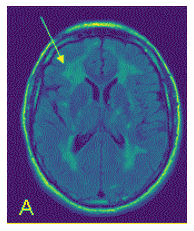

In [47]:
plt.subplot(1, 1, 1)
plt.axis('off')
plt.imshow(image)

In [48]:
image_to_predict = np.asarray(image)
img = skimage.transform.resize(image_to_predict, (48, 48, 3))

In [49]:
tab = []
tab.append(img)
tab = np.array(tab)
print(dict[np.argmax(model.predict(tab))])

healthy


In [50]:
from skimage import io
from skimage.transform import resize
img_path='drive/My Drive/brain tumor/A1.jpg'
image=io.imread(img_path)


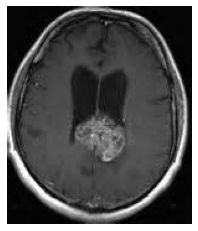

In [51]:
plt.subplot(1, 1, 1)
plt.axis('off')
plt.imshow(image)

In [52]:
image_to_predict = np.asarray(image)
img = skimage.transform.resize(image_to_predict, (48, 48, 3))

In [53]:
tab = []
tab.append(img)
tab = np.array(tab)
print(dict[np.argmax(model.predict(tab))])

brain tumor
